In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


In [46]:
hc = pd.read_csv("Cardiovascular dataset (1).csv",sep =';')

In [47]:
hc

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1


In [48]:
hc.rename(columns = {'age':'age_days'},inplace=True)

In [49]:
hc

,id,age_days,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1


In [50]:
# 1. What is the shape of the dataset?
hc.shape

(70000, 13)

<Axes: >

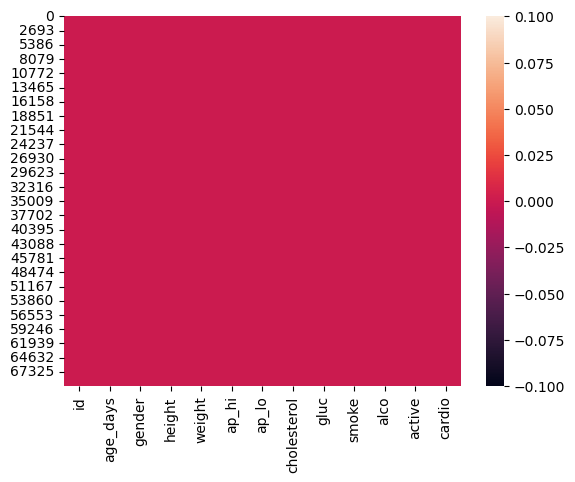

In [51]:
# 2. Are there any missing values in the dataset?
sns.heatmap(hc.isnull())

# no, there are no missing values in the dataset.

gender: [2 1]
cholesteral: [1 3 2]
Glucose: [1 2 3]


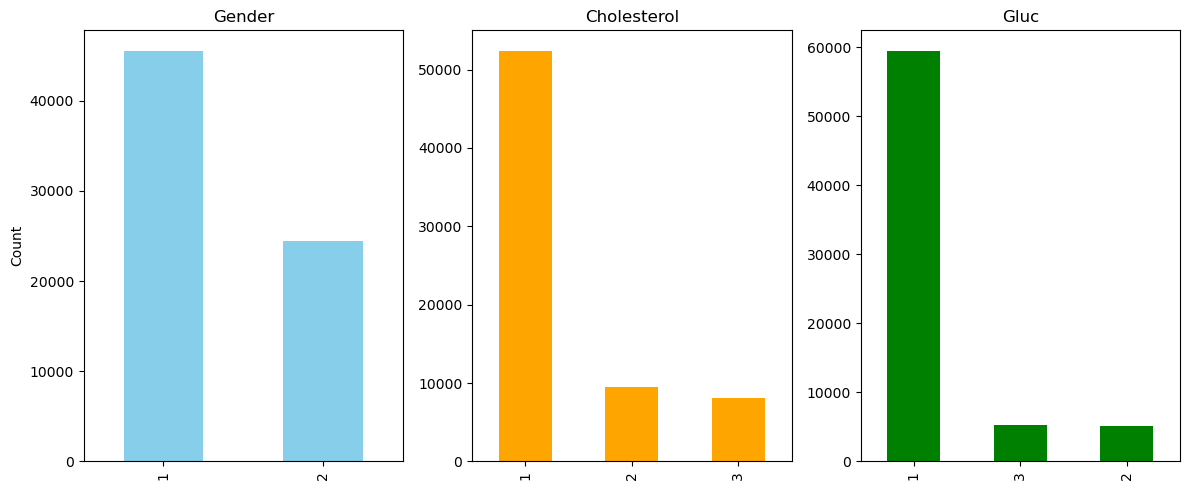

In [11]:
# 3. What are the unique values for categorical features like gender, 
# cholesterol, gluc?

print('gender:',hc['gender'].unique())
print('cholesteral:',hc['cholesterol'].unique())
print('Glucose:',hc['gluc'].unique())



plt.figure(figsize=(12, 5))

# Gender
plt.subplot(1, 3, 1)
hc['gender'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Gender')
plt.xlabel('')
plt.ylabel('Count')

# Cholesterol
plt.subplot(1, 3, 2)
hc['cholesterol'].value_counts().plot(kind='bar', color='orange')
plt.title('Cholesterol')
plt.xlabel('')

# Gluc
plt.subplot(1, 3, 3)
hc['gluc'].value_counts().plot(kind='bar', color='green')
plt.title('Gluc')
plt.xlabel('')

plt.tight_layout()
plt.show()


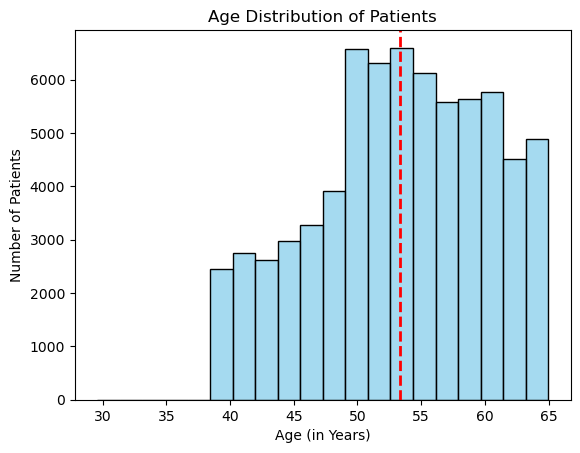

In [52]:
# 4.What’s the average age of patients (in years)? 
hc['age_years'] = hc['age_days']/365
avg_age=hc['age_years'].mean()
sns.histplot(hc['age_years'], bins=20, kde=False, color='skyblue', edgecolor='black')
plt.axvline(avg_age, color='red', linestyle='dashed', linewidth=2)
plt.title("Age Distribution of Patients")
plt.xlabel("Age (in Years)")
plt.ylabel("Number of Patients")
plt.show()

# the average age of patients :-53.33

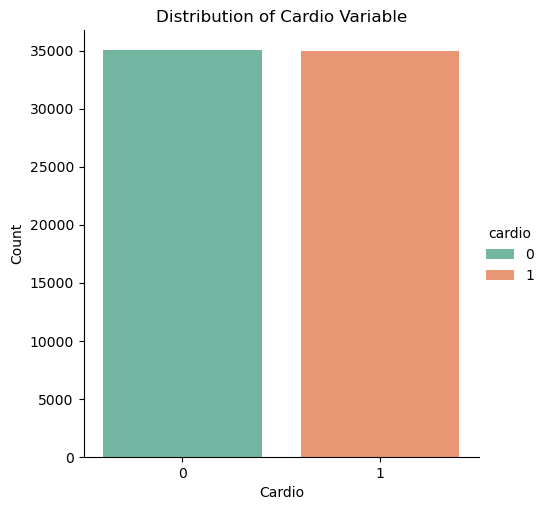

In [13]:
#5. What is the distribution of the target variable (cardio)?
hc['cardio'].value_counts()
sns.catplot(x='cardio', data=hc,hue='cardio',kind='count',palette='Set2')
plt.title('Distribution of Cardio Variable')
plt.xlabel('Cardio')
plt.ylabel('Count')
plt.show()


In [14]:
# 6. What is the average age (in years) of patients?
avg_year = hc['age_years'].mean()

In [15]:
avg_year

53.33935839530333

# the average age (in years) of patients :- 53.33

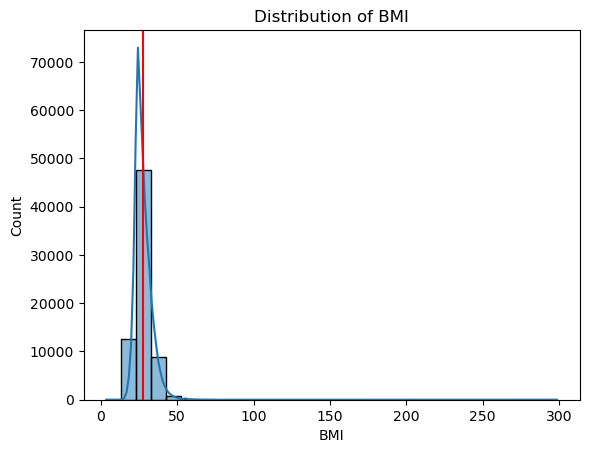

In [16]:
# 7.What is the distribution of BMI? (Create new BMI feature)
hc['bmi'] = hc['weight'] / ((hc['height']/100)**2)
sns.histplot(hc['bmi'], bins=30, kde=True)
plt.title('Distribution of BMI')
plt.xlabel('BMI')
plt.ylabel('Count')
plt.axvline(hc['bmi'].mean(), color='red')
plt.show()

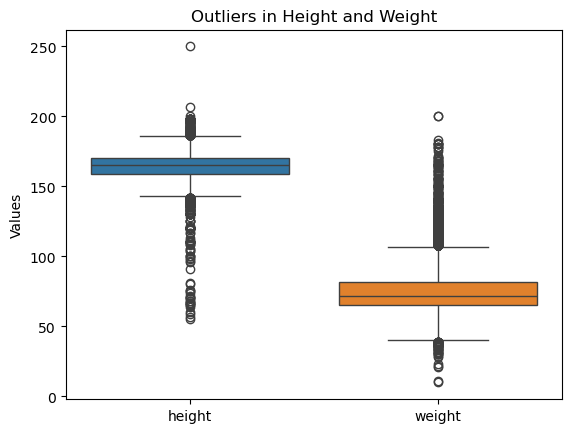

In [17]:
# 8.Are there outliers in height or weight? 
sns.boxplot(data=hc[['height', 'weight']])
plt.title('Outliers in Height and Weight')
plt.ylabel('Values')
plt.show()

# yes,there outliers in height or weight

Text(0, 0.5, 'Systolic BP (ap_hi)')

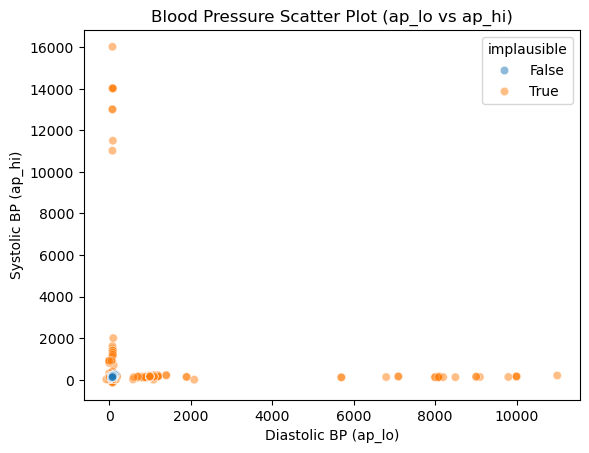

In [53]:
# 9. Are there implausible blood pressure values (e.g., ap_hi < ap_lo or too high)?

hc['implausible'] = ((hc['ap_hi'] < hc['ap_lo']) |
                     (hc['ap_hi'] > 250) | (hc['ap_lo'] > 200) |
                     (hc['ap_hi'] < 70)  | (hc['ap_lo'] < 40))

sns.scatterplot(x='ap_lo', y='ap_hi', hue='implausible', data=hc, alpha=0.5)
plt.title("Blood Pressure Scatter Plot (ap_lo vs ap_hi)")
plt.xlabel("Diastolic BP (ap_lo)")
plt.ylabel("Systolic BP (ap_hi)")



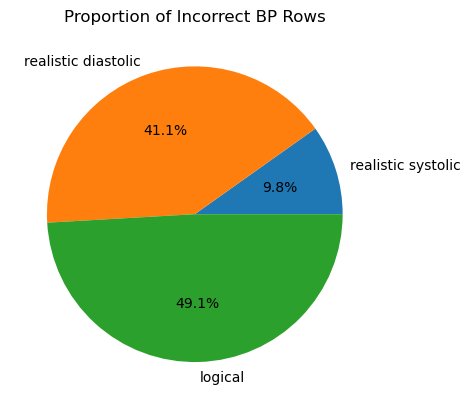

In [19]:
# 10.  How many rows have incorrect blood pressure values?
#Column             Condition                                     Reason
#ap_hi              between 80 and 250                     realistic systolic
#ap_lo              between 50 and 200                     realistic diastolic
#ap_hi >= ap_lo     systolic must be ≥ diastolic           logical

cond1 = (hc['ap_hi'] < 80) | (hc['ap_hi'] > 250)
cond2 = (hc['ap_lo'] < 50) | (hc['ap_lo'] > 200)
cond3 = hc['ap_hi'] < hc['ap_lo']

counts = [cond1.sum(), cond2.sum(), cond3.sum()]
labels = ["realistic systolic", "realistic diastolic", "logical"]

plt.pie(counts, labels=labels, autopct='%1.1f%%')
plt.title("Proportion of Incorrect BP Rows")
plt.show()

# their is 41.1% realistic diastolic , 9.8% realistic systolic and 49.1% logical


In [54]:
# 11. Remove rows with invalid blood pressure, height, or weight?
#Height between 120cm to 220cm
#Weight between 40 to 200kg
valid_rows = (
    (hc['ap_hi'].between(80, 250)) &
    (hc['ap_lo'].between(50, 200)) &
    (hc['ap_hi'] >= hc['ap_lo']) &
    (hc['height'].between(120, 220)) &
    (hc['weight'].between(40, 200))
)

clean = hc[valid_rows]

print("Original rows:", hc.shape[0])
print("Cleaned rows:", clean.shape[0])
print("Removed rows:", hc.shape[0] - clean.shape[0])


Original rows: 70000
Cleaned rows: 68553
Removed rows: 1447


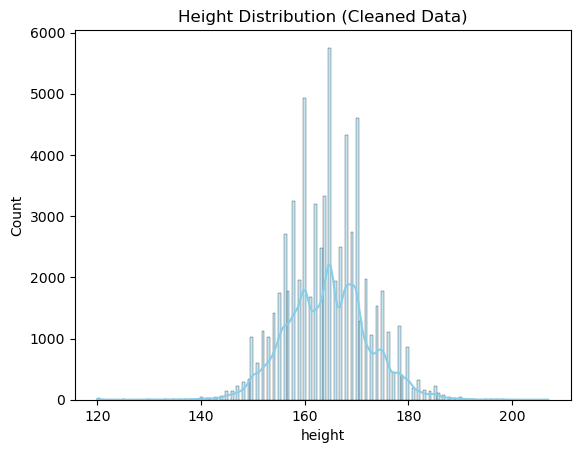

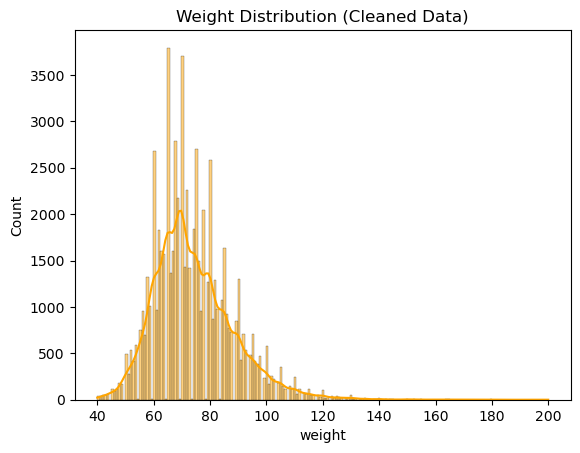

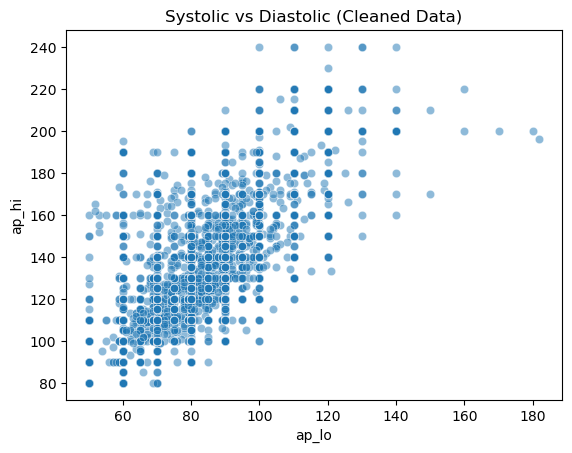

In [55]:
sns.histplot(clean['height'], kde=True, color="skyblue")
plt.title("Height Distribution (Cleaned Data)")
plt.show()

# Weight distribution
sns.histplot(clean['weight'], kde=True, color="orange")
plt.title("Weight Distribution (Cleaned Data)")
plt.show()

# Blood Pressure scatterplot
sns.scatterplot(data=clean, x="ap_lo", y="ap_hi", alpha=0.5)
plt.title("Systolic vs Diastolic (Cleaned Data)")
plt.show()

In [56]:
# 12. What is the distribution of cholesterol and glucose levels after cleaning?
print(hc['cholesterol'].value_counts())
print(hc['gluc'].value_counts())

# For percentages:
print(hc['cholesterol'].value_counts(normalize=True) * 100)
print(hc['gluc'].value_counts(normalize=True) * 100)

cholesterol
1    52385
2     9549
3     8066
Name: count, dtype: int64
gluc
1    59479
3     5331
2     5190
Name: count, dtype: int64
cholesterol
1    74.835714
2    13.641429
3    11.522857
Name: proportion, dtype: float64
gluc
1    84.970000
3     7.615714
2     7.414286
Name: proportion, dtype: float64


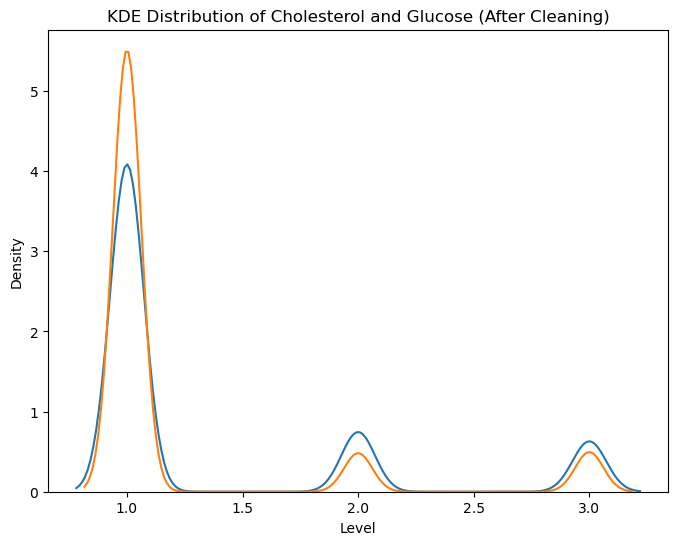

In [23]:
plt.figure(figsize=(8,6))
sns.kdeplot(hc['cholesterol'], label='Cholesterol')
sns.kdeplot(hc['gluc'], label='Glucose')
plt.title('KDE Distribution of Cholesterol and Glucose (After Cleaning)')
plt.xlabel('Level')
plt.ylabel('Density')
plt.show()

In [57]:
#13. How many smokers have cardiovascular disease? 

smokers_with_cardio = hc[(hc['smoke'] == 1) & (hc['cardio'] == 1)]
count = smokers_with_cardio.shape[0]
print("Number of smokers with cardiovascular disease:", count)


Number of smokers with cardiovascular disease: 2929


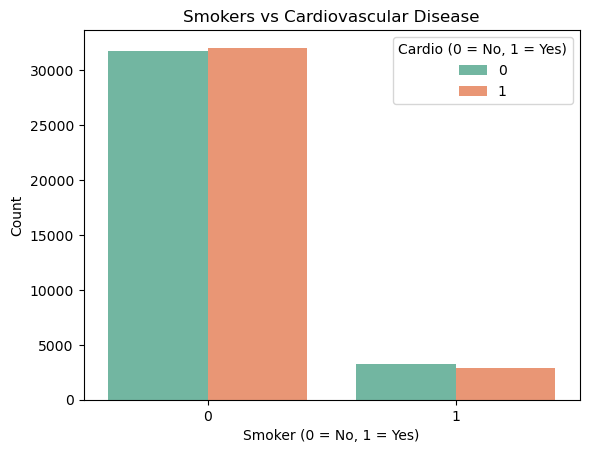

In [58]:
sns.countplot(x='smoke', hue='cardio', data=hc, palette='Set2')
plt.title('Smokers vs Cardiovascular Disease')
plt.xlabel('Smoker (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.legend(title='Cardio (0 = No, 1 = Yes)')
plt.show()

In [59]:
  #14. Does alcohol intake correlate with higher cardio risk?
pd.crosstab(hc['alco'], hc['cardio'])


cardio,0,1
alco,,
0,33080,33156
1,1941,1823


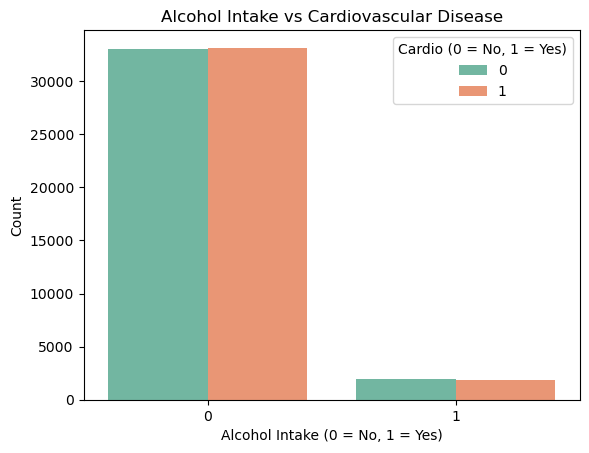

In [60]:
sns.countplot(x='alco', hue='cardio', data=hc, palette='Set2')
plt.title('Alcohol Intake vs Cardiovascular Disease')
plt.xlabel('Alcohol Intake (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.legend(title='Cardio (0 = No, 1 = Yes)')
plt.show()

 # yes, alcohol intake correlate with higher cardio risk

In [28]:
# 15. What’s the correlation between features? 
corr_matrix = hc.corr(numeric_only=True)
corr_matrix

,id,age_days,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_years,bmi,implausible
id,1.000000,0.003457,0.003502,-0.003038,-0.001830,0.003356,-0.002529,0.006106,0.002467,-0.003699,0.001210,0.003755,0.003799,0.003457,-0.001377,-0.000829
age_days,0.003457,1.000000,-0.022811,-0.081515,0.053684,0.020764,0.017647,0.154424,0.098703,-0.047633,-0.029723,-0.009927,0.238159,1.000000,0.085512,0.012185
gender,0.003502,-0.022811,1.000000,0.499033,0.155406,0.006005,0.015254,-0.035821,-0.020491,0.338135,0.170966,0.005866,0.008109,-0.022811,-0.096529,0.014086
height,-0.003038,-0.081515,0.499033,1.000000,0.290968,0.005488,0.006150,-0.050226,-0.018595,0.187989,0.094419,-0.006570,-0.010821,-0.081515,-0.290642,-0.001668
weight,-0.001830,0.053684,0.155406,0.290968,1.000000,0.030702,0.043710,0.141768,0.106857,0.067780,0.067113,-0.016867,0.181660,0.053684,0.762009,0.043194
ap_hi,0.003356,0.020764,0.006005,0.005488,0.030702,1.000000,0.016086,0.023778,0.011841,-0.000922,0.001408,-0.000033,0.054475,0.020764,0.024852,0.100097
ap_lo,-0.002529,0.017647,0.015254,0.006150,0.043710,0.016086,1.000000,0.024019,0.010806,0.005186,0.010601,0.004780,0.065719,0.017647,0.035345,0.584824
cholesterol,0.006106,0.154424,-0.035821,-0.050226,0.141768,0.023778,0.024019,1.000000,0.451578,0.010354,0.035760,0.009911,0.221147,0.154424,0.146270,0.023432
gluc,0.002467,0.098703,-0.020491,-0.018595,0.106857,0.011841,0.010806,0.451578,1.000000,-0.004756,0.011246,-0.006770,0.089307,0.098703,0.101390,0.009609
smoke,-0.003699,-0.047633,0.338135,0.187989,0.067780,-0.000922,0.005186,0.010354,-0.004756,1.000000,0.340094,0.025858,-0.015486,-0.047633,-0.027215,0.004085


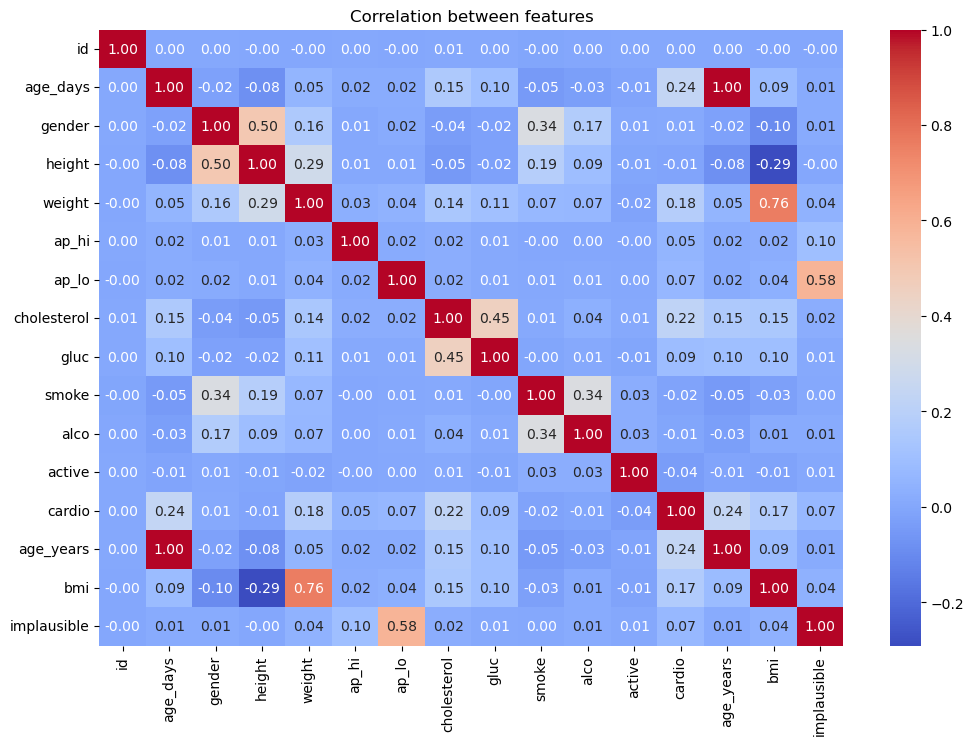

In [29]:
plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation between features')
plt.show()

In [61]:
# 16.  Compare mean BMI for cardio vs. non-cardio
mean_bmi = hc.groupby('cardio')['bmi'].mean()
mean_bmi

KeyError: 'Column not found: bmi'

In [ ]:
sns.barplot(x='cardio', y='bmi', data=hc,hue='cardio')
plt.title('Mean BMI: Cardio vs Non-Cardio')
plt.show()

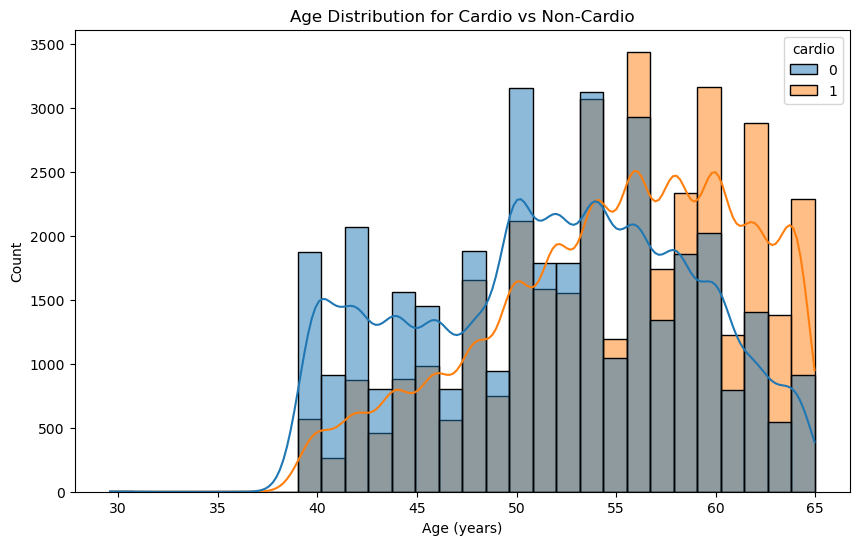

In [32]:
# 17. Plot age distribution for those with and without cardio disease
plt.figure(figsize=(10,6))

sns.histplot(data=hc, x='age_years', hue='cardio', bins=30, kde=True)
plt.title('Age Distribution for Cardio vs Non-Cardio')
plt.xlabel('Age (years)')
plt.ylabel('Count')
plt.show()

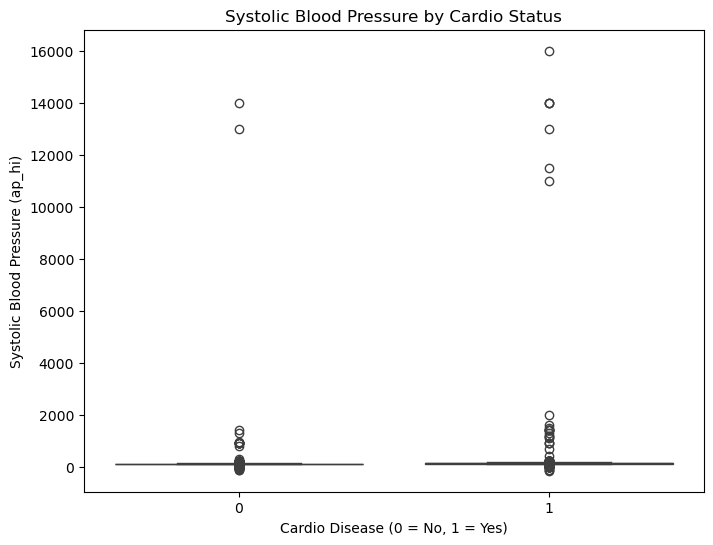

In [62]:
# 18. Boxplot of systolic blood pressure by cardio status 
plt.figure(figsize=(8,6))

sns.boxplot(x='cardio', y='ap_hi', data=hc)
plt.title('Systolic Blood Pressure by Cardio Status')
plt.xlabel('Cardio Disease (0 = No, 1 = Yes)')
plt.ylabel('Systolic Blood Pressure (ap_hi)')
plt.show()


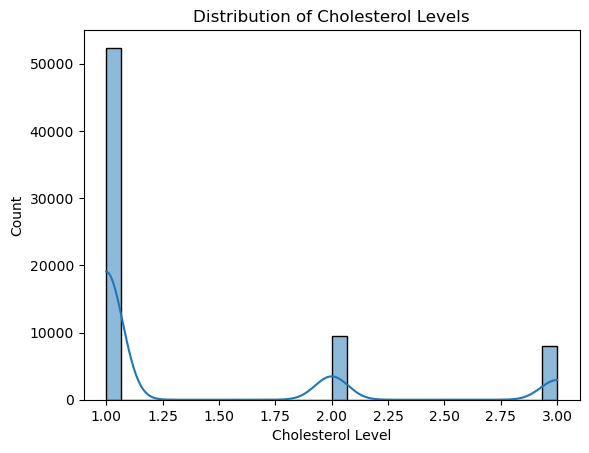

In [63]:
# 19.  What is the distribution of cholesterol levels? 
sns.histplot(x='cholesterol', data=hc, bins=30, kde=True)
plt.title('Distribution of Cholesterol Levels')
plt.xlabel('Cholesterol Level')
plt.ylabel('Count')
plt.show()

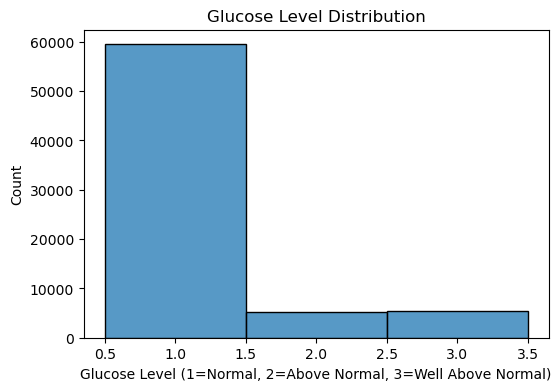

In [35]:
# 20. What percentage of patients have above-normal glucose levels?
above_normal = (hc['gluc'] > 1).sum()
# Total patients
total = len(hc)
total
plt.figure(figsize=(6,4))
ax = sns.histplot(x='gluc', data=hc, discrete=True)
plt.title('Glucose Level Distribution')
plt.xlabel('Glucose Level (1=Normal, 2=Above Normal, 3=Well Above Normal)')
plt.ylabel('Count')
plt.show()

Insightful Analysis Questions 

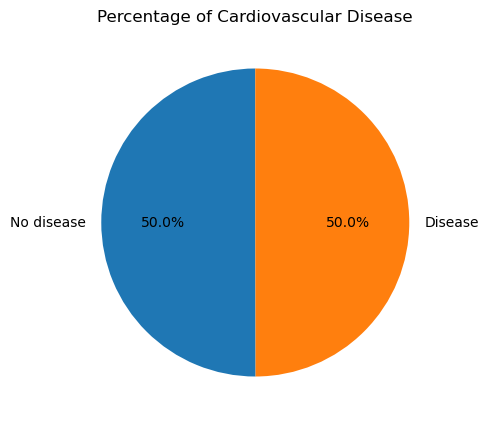

In [64]:
# 1. What percentage of the dataset has cardiovascular disease? 
cardio_cases = (hc['cardio'] == 1).sum()

total = len(hc)

percentage = (cardio_cases / total) * 100
percentage
cardio_counts = hc['cardio'].value_counts()
plt.figure(figsize=(5,5))
plt.pie(cardio_counts, labels=['No disease','Disease'], autopct='%.1f%%', startangle=90)
plt.title('Percentage of Cardiovascular Disease')
plt.show()

# disease has 50% n no disease has 50%

cardio               0          1
cholesterol                      
1            55.989310  44.010690
2            39.784271  60.215729
3            23.456484  76.543516


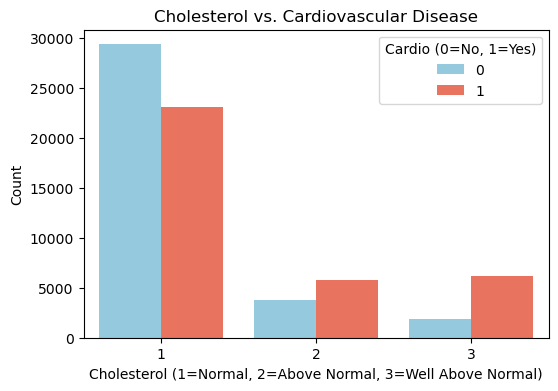

In [37]:
# 2.  Is there a link between cholesterol and heart disease? 
chol_cardio_table = pd.crosstab(hc['cholesterol'], hc['cardio'], normalize='index') * 100
print(chol_cardio_table)
plt.figure(figsize=(6,4))
sns.countplot(x='cholesterol', hue='cardio', data=hc,palette={0: 'skyblue', 1: 'tomato'})
plt.title('Cholesterol vs. Cardiovascular Disease')
plt.xlabel('Cholesterol (1=Normal, 2=Above Normal, 3=Well Above Normal)')
plt.ylabel('Count')
plt.legend(title='Cardio (0=No, 1=Yes)')
plt.show()

# yes,cholesterol and heart disease there is a link.

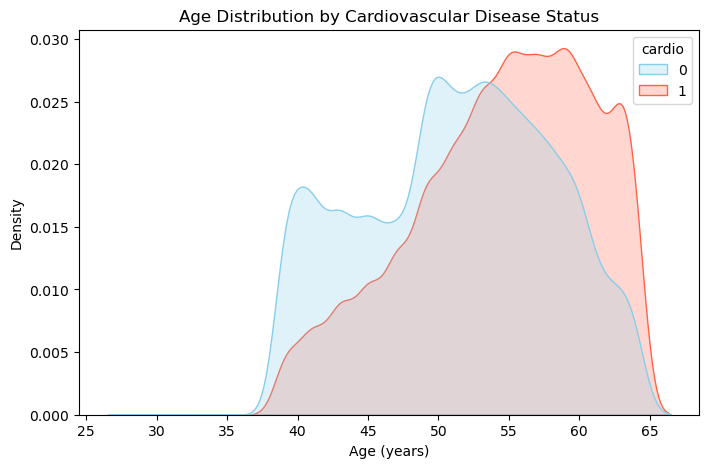

In [38]:
# 3.  Does age impact heart disease prevalence?
hc['age_years'] = (hc['age_days'] / 365).astype(int)

hc['age_years']
plt.figure(figsize=(8,5))
sns.kdeplot(data=hc, x='age_years', hue='cardio', fill=True, palette={0:'skyblue',1:'tomato'})
plt.title('Age Distribution by Cardiovascular Disease Status')
plt.xlabel('Age (years)')
plt.ylabel('Density')
plt.show()

# yes,age impact heart disease prevalence

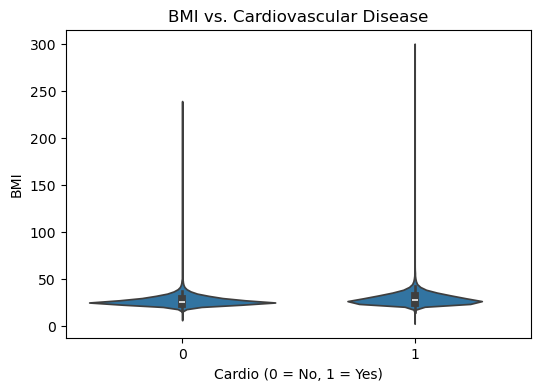

In [39]:
# 4. Is BMI higher in those with heart disease? 
hc.groupby('cardio')['bmi'].mean()
hc.groupby('cardio')['bmi'].median()
plt.figure(figsize=(6,4))
sns.violinplot(x='cardio', y='bmi', data=hc)
plt.title('BMI vs. Cardiovascular Disease')
plt.xlabel('Cardio (0 = No, 1 = Yes)')
plt.ylabel('BMI')
plt.show()

# yes,BMI higher in those with heart disease

In [40]:
# 5. Does physical activity reduce heart disease risk?
hc.groupby('active')['cardio'].mean()
pr = pd.crosstab(hc['active'], hc['cardio'], normalize='index') * 100
pr


cardio,0,1
active,,
0,46.422593,53.577407
1,50.910933,49.089067


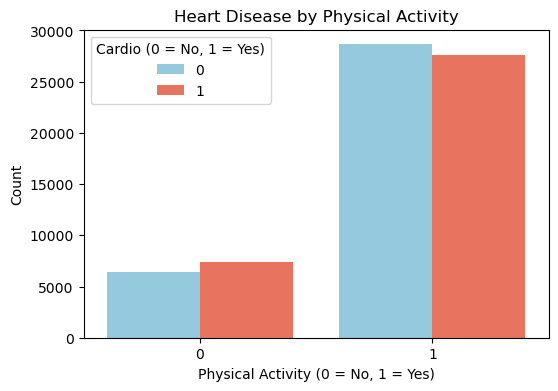

In [41]:
plt.figure(figsize=(6,4))
sns.countplot(x='active', hue='cardio', data=hc, palette={0:'skyblue',1:'tomato'})
plt.title('Heart Disease by Physical Activity')
plt.xlabel('Physical Activity (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.legend(title='Cardio (0 = No, 1 = Yes)')
plt.show()


# we can see physical activity reduce heart disease risk

In [42]:
# 6. Do smokers have more heart disease? 
hc.groupby('active')['cardio'].mean()
pd.crosstab(hc['smoke'], hc['cardio'], normalize='index') * 100


cardio,0,1
smoke,,
0,49.789287,50.210713
1,52.520668,47.479332


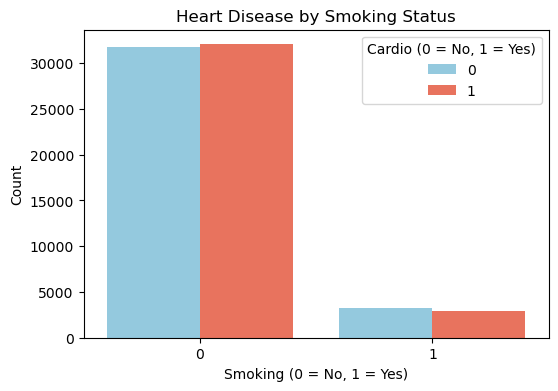

In [43]:
plt.figure(figsize=(6,4))
sns.countplot(x='smoke', hue='cardio', data=hc, palette={0:'skyblue',1:'tomato'})
plt.title('Heart Disease by Smoking Status')
plt.xlabel('Smoking (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.legend(title='Cardio (0 = No, 1 = Yes)')
plt.show()

# it is shown that smokers have more heart disease

In [44]:
# 7.  Is systolic pressure significantly higher in those with heart disease?
hc.groupby('cardio')['ap_hi'].mean()
hc.groupby('cardio')['ap_hi'].median()


cardio
0    120.0
1    130.0
Name: ap_hi, dtype: float64

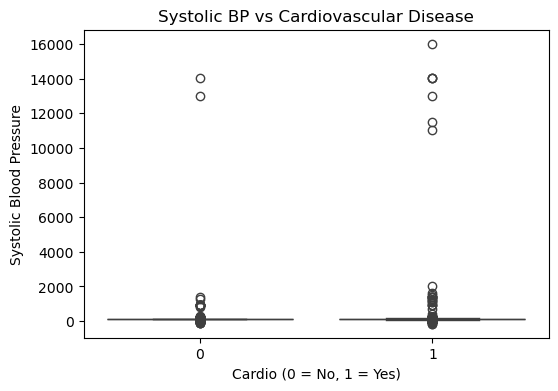

In [45]:
plt.figure(figsize=(6,4))
sns.boxplot(x='cardio', y='ap_hi', data=hc)
plt.title('Systolic BP vs Cardiovascular Disease')
plt.xlabel('Cardio (0 = No, 1 = Yes)')
plt.ylabel('Systolic Blood Pressure')
plt.show()

# yes,systolic pressure significantly higher in those with heart disease